In [249]:
import pandas as pd


In [250]:
train_data = pd.read_csv("/content/trainKNN.txt")
train_data.columns = ['Id','RI','Na','Mg','Al','Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [251]:
test_data = pd.read_csv("/content/testKNN.txt")
test_data.columns = ['Id','RI','Na','Mg','Al','Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [212]:
train_data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [252]:
test_data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [253]:
train_data=train_data.drop(['Id'],axis=1)
test_data=test_data.drop(['Id'],axis=1)
train_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
190,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
191,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
192,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
193,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7


In [254]:
test_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [255]:
#  Type of glass: (class attribute)
#  -- 1 building_windows_float_processed
#  -- 2 building_windows_non_float_processed
#  -- 3 vehicle_windows_float_processed
#  -- 4 vehicle_windows_non_float_processed (none in this database)
#  -- 5 containers
#  -- 6 tableware
#  -- 7 headlamps

In [256]:
train_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1.518281,13.373846,2.750103,1.456154,72.639795,0.521744,8.911538,0.165077,0.050513,2.676923
std,0.003057,0.784929,1.390655,0.492293,0.763064,0.673624,1.425102,0.486304,0.086506,2.064234
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516455,12.875000,2.335000,1.190000,72.330000,0.145000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.270000,3.480000,1.360000,72.810000,0.560000,8.570000,0.000000,0.000000,2.000000
75%,1.518950,13.795000,3.605000,1.625000,73.080000,0.610000,9.105000,0.000000,0.090000,3.000000
max,1.533930,15.790000,3.980000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [257]:
train_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [258]:
train_data.shape

(195, 10)

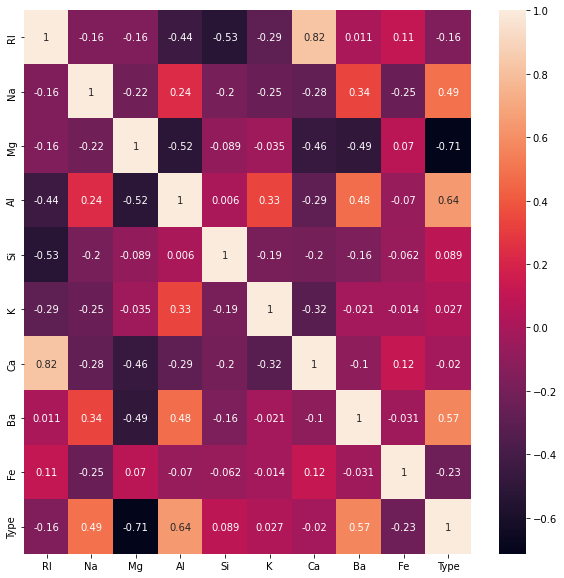

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True)

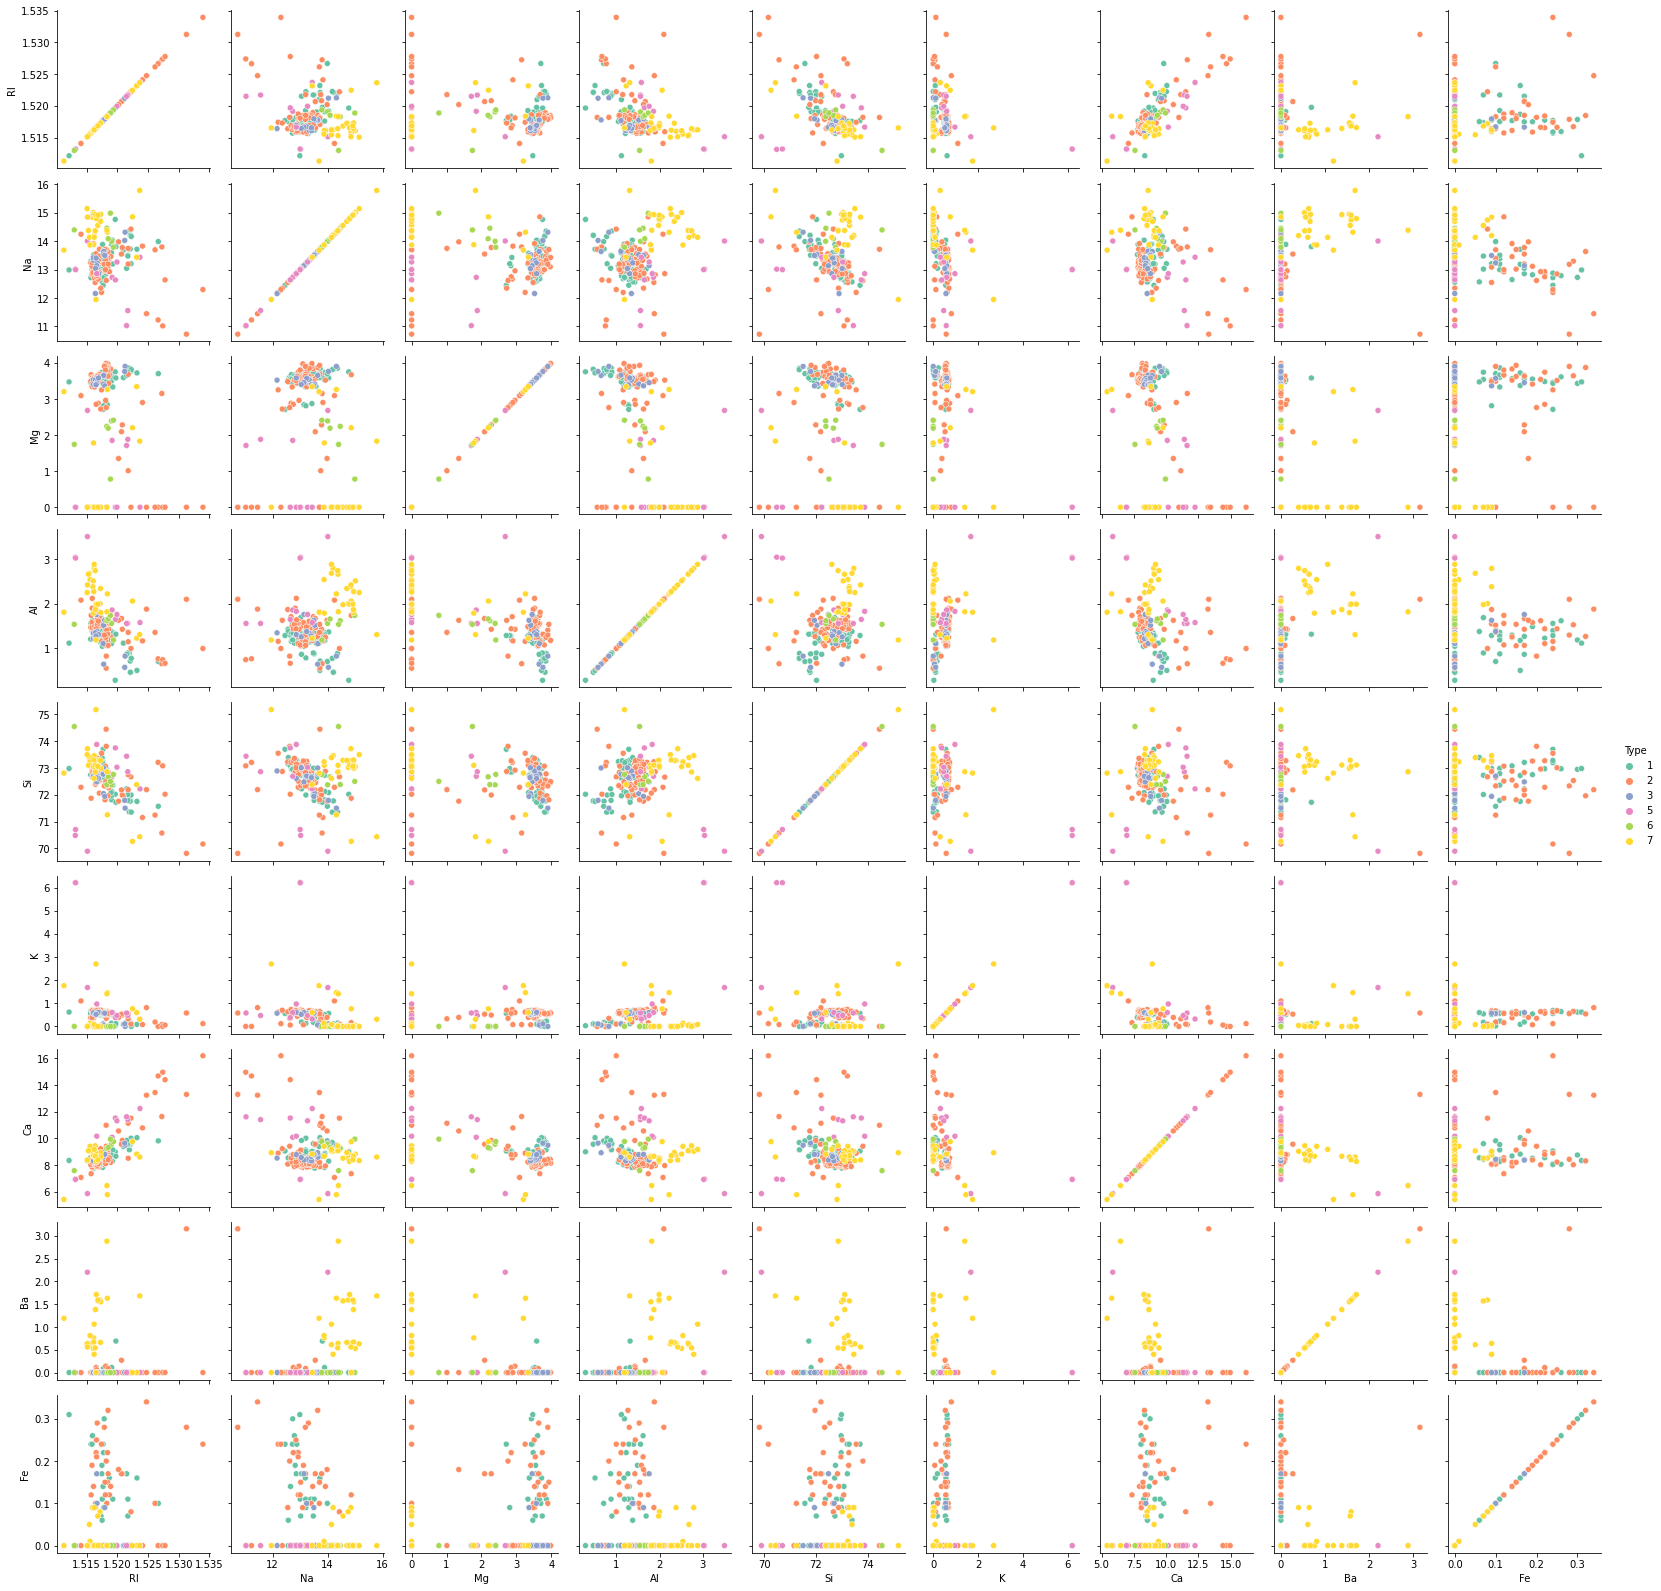

In [260]:

g=sns.PairGrid(train_data,hue='Type',palette='Set2')
g.map(sns.scatterplot)
g.add_legend()
plt.show()

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data.drop('Type',axis=1))
Scaled = scaler.transform(train_data.drop('Type',axis=1))

In [262]:
scaler.fit(test_data.drop('Type',axis=1))
scaletest = scaler.transform(test_data.drop('Type',axis=1))

In [263]:
t_data = pd.DataFrame(Scaled,columns=train_data.columns[:-1])
t_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.220113,0.659273,0.612722,-0.195821,0.118519,-0.062128,-0.760873,-0.340326,-0.585428
1,-0.689081,0.199452,0.576675,0.170756,0.460128,-0.196078,-0.796049,-0.340326,-0.585428
2,-0.203716,-0.209277,0.677607,-0.338379,-0.039147,0.071821,-0.486504,-0.340326,-0.585428
3,-0.282424,-0.132641,0.627141,-0.440206,0.578377,0.042055,-0.592031,-0.340326,-0.585428
4,-0.761230,-0.745735,0.619932,0.333679,0.433850,0.176004,-0.592031,-0.340326,2.427890


In [264]:
test = pd.DataFrame(scaletest,columns=test_data.columns[:-1])
test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.927858,-0.641201,1.069659,-0.825661,-0.735267,-0.104465,0.277670,-0.505641,0.193094
1,1.470762,-0.463426,1.069659,-0.966199,-0.973030,-0.520103,0.531844,-0.505641,-0.597160
2,-0.697188,-0.753480,1.004673,0.737825,-0.146521,1.520300,-0.913320,-0.505641,-0.779527
3,-0.876933,-0.762837,0.833347,-0.245942,0.136531,1.218018,-0.455805,-0.505641,0.679404
4,-0.220312,-0.893829,1.122829,-0.228374,-0.316351,1.369159,-0.550213,-0.505641,1.348080


In [266]:
x=t_data.iloc[:,:].values
y = train_data.iloc[:,9].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [267]:
x_t=test.iloc[:,:].values
y_t = test_data.iloc[:,9].values


In [268]:
y_t

array([1, 1, 2, 2, 2, 3, 3, 3, 5, 5, 5, 6, 6, 6, 7, 7, 7])

In [269]:
import numpy as np
from sklearn.model_selection import cross_val_score
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.6410256410256411
K :  2  Train Accuracy :  0.841025641025641  Val Accuracy :  0.6717948717948719
K :  3  Train Accuracy :  0.8512820512820513  Val Accuracy :  0.676923076923077
K :  4  Train Accuracy :  0.7948717948717948  Val Accuracy :  0.6717948717948717
K :  5  Train Accuracy :  0.8051282051282052  Val Accuracy :  0.6564102564102564
K :  6  Train Accuracy :  0.7794871794871795  Val Accuracy :  0.6512820512820513
K :  7  Train Accuracy :  0.7333333333333333  Val Accuracy :  0.6256410256410256
K :  8  Train Accuracy :  0.7538461538461538  Val Accuracy :  0.6358974358974359
K :  9  Train Accuracy :  0.7230769230769231  Val Accuracy :  0.6307692307692307
K :  10  Train Accuracy :  0.7128205128205128  Val Accuracy :  0.641025641025641
K :  20  Train Accuracy :  0.6923076923076923  Val Accuracy :  0.5846153846153845
K :  40  Train Accuracy :  0.6153846153846154  Val Accuracy :  0.5435897435897437
K :  80  Train Accuracy :  0.49230769230769

In [273]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x,y)
y_pred = knn.predict(x_t)
y_pred

array([1, 1, 2, 1, 2, 2, 2, 1, 5, 2, 5, 6, 2, 2, 7, 7, 7])

Confusion matrix:
 [[2 0 0 0 0 0]
 [1 2 0 0 0 0]
 [2 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 1 0 0 2 0]
 [0 0 0 0 0 3]]


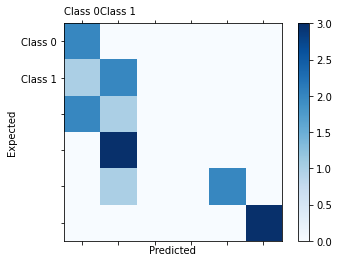

In [271]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_t, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [274]:
from sklearn.metrics import f1_score
f1_score(y_true=y_t, y_pred=y_pred, average='weighted')


0.5549019607843138

In [275]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(x,y)
knn.score(x_t,y_t)
y_predict = knn.predict(x_t)
y_predict

array([1, 1, 2, 1, 1, 2, 2, 1, 5, 2, 5, 6, 6, 7, 7, 7, 7])

Confusion matrix:
 [[2 0 0 0 0 0]
 [2 1 0 0 0 0]
 [1 2 0 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 2 1]
 [0 0 0 0 0 3]]


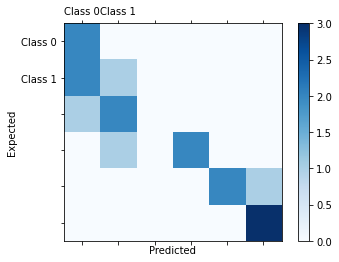

In [276]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_t, y_pred=y_predict)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [277]:
from sklearn.metrics import f1_score
f1_score(y_true=y_t, y_pred=y_predict, average='weighted')


0.5512605042016807